<a href="https://colab.research.google.com/github/tejpal123456789/NLP1/blob/main/Blog1_textclassfication_BILSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install -U spacy 
# !pip install -U pandas
# !pip install -U numpy 


In [2]:
import torch 
print(torch.__version__)
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
import spacy 
print(spacy.__version__)
from matplotlib import pyplot as plt
import seaborn as sns


1.9.0+cu102
1.3.5
1.21.6
3.4.4


In [3]:

data=pd.read_csv('/content/drive/MyDrive/NLP Blogs/NLP Dataset /Blog_1_dataset/disaster.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
data.shape

(7613, 5)

In [5]:
data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
data['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

# Exploratory Data Analysis

Main question is what we should visualize:
This totally depends on the domain knowledge or the problem you are solving.
For our project I can list of some visulizations:
a) Count plot of target [ as it is classfication problem ]
b) We could plot histogram of length of texts for both target values [ This will help to see the relationship between the target and length of text]
c) Could plot word clouds for both targets which will show the most frequent words used in each target


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


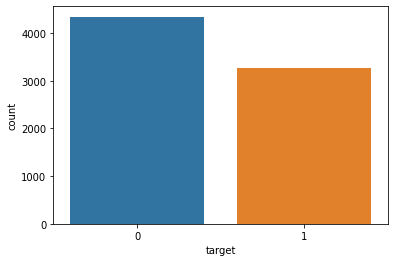

In [7]:
sns.countplot(data['target'])

In [8]:

# Visualize word cloud : 
def create_corpus_of_target(data,target):
    corpus=[]
    for x in data[data['target']==target].text.str.split():
        for i in x:
            corpus.append(i)
    return corpus         



In [9]:

from wordcloud import WordCloud
corpus0=create_corpus_of_target(data,0)
corpus1=create_corpus_of_target(data,1)

word_cloud_corpus0=WordCloud(background_color='white',max_font_size=80).generate(' '.join(corpus0[:50]))


word_cloud_corpus1=WordCloud(background_color='white',max_font_size=80).generate(' '.join(corpus1[:50]))

Text(0.5, 1.0, 'WORDCLOUD FOR NONDISASTER DATA')

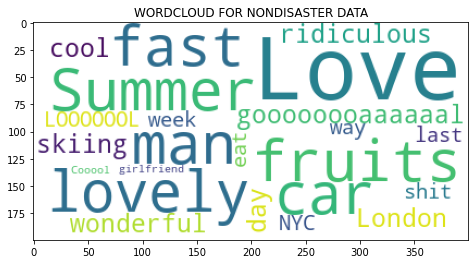

In [10]:
plt.figure(figsize=(16,4))
plt.imshow(word_cloud_corpus0)
plt.title('WORDCLOUD FOR NONDISASTER DATA')


Text(0.5, 1.0, 'WORDCLOUD FOR DISASTER DATA')

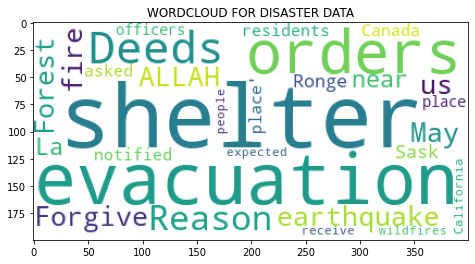

In [11]:
plt.figure(figsize=(16,4))
plt.imshow(word_cloud_corpus1)
plt.title('WORDCLOUD FOR DISASTER DATA')


# feature Engineering in NLP

This is a very critical step in natural language processesing project, how to do feature engineering ?
In NLP we have text, we need to think of ways through which we generate more features for each text. Again This is a domain specific problem. For our project , I can list of some ways of feature generation 

1. Length of each text in the dataset 
2. Number of words per text 
3. No. of unique words per text
4. Number of punctutions per text could be one column
5. and many more according to problem statement we have to consult which domain expert and product manager for this analysis.


In [12]:
# Length of each text
data['text length']=data['text'].apply(lambda x: len(x))


In [13]:
# number of words in each text 
data['word count']=data['text'].apply(lambda x: len(x.split()))



In [14]:
# Number of unique words per text: 
data['unique_words']=data['text'].apply(lambda x: len(set(str(x).split())))


In [15]:
import string
     

data['number of punctuations']=data['text'].apply(lambda x: len([y for y in x if y in string.punctuation]))
data.head()


,id,keyword,location,text,target,text length,word count,unique_words,number of punctuations
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,13,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,7,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,20,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,8,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,15,2


# text cleaning

In [16]:
# We will remove stopwords 
# remove http,html
# remove emoji
# remove punctuation
# lower case the whole senetence 
# use of lematizer
import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

def cleanhtml(text):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', text)
  return cleantext

def remove_http(text):
    text1=re.sub(r'http\S+', '', text)
    return text1

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)


def remove_punc(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

def remove_stopwords(text):
    text=[word.lower() for word in text.split() if word not  in stop]
    return " ".join(text)

    

data['text']=data['text'].apply(lambda x: remove_http(x))
data['text']=data['text'].apply(lambda x: remove_punc(x))
data['text']=data['text'].apply(lambda x: deEmojify(x))
data['text']=data['text'].apply(lambda x: cleanhtml(x))
data['text']=data['text'].apply(lambda x: remove_stopwords(x))
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target,text length,word count,unique_words,number of punctuations
0,1,NaN,NaN,our deeds reason earthquake may allah forgive us,1,69,13,13,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1,38,7,7,1
2,5,NaN,NaN,all residents asked shelter place notified off...,1,133,22,20,3
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,65,8,8,2
4,7,NaN,NaN,just got sent photo ruby alaska smoke wildfire...,1,88,16,15,2


In [17]:
!python -m spacy download en_core_web_sm
spacy_eng = spacy.load("en_core_web_sm")

2023-02-06 12:38:38.282148: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [18]:
!pip install torchtext==0.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import torchtext

In [20]:
# prepare dataset for our pytorch 

# will use torch text for our dataset prepartion in pytorch
import torchtext
print(torchtext.__version__)
from torchtext.legacy.data import Field, TabularDataset, BucketIterator, Iterator

0.10.0


In [21]:
data.head()

,id,keyword,location,text,target,text length,word count,unique_words,number of punctuations
0,1,NaN,NaN,our deeds reason earthquake may allah forgive us,1,69,13,13,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1,38,7,7,1
2,5,NaN,NaN,all residents asked shelter place notified off...,1,133,22,20,3
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,65,8,8,2
4,7,NaN,NaN,just got sent photo ruby alaska smoke wildfire...,1,88,16,15,2


In [22]:
df = data[['text', 'target']]
df.head()

,text,target
0,our deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,all residents asked shelter place notified off...,1
3,13000 people receive wildfires evacuation orde...,1
4,just got sent photo ruby alaska smoke wildfire...,1


In [23]:
import torchtext
print(torchtext.__version__)

import spacy
import pandas as pd
from torchtext.legacy.data import Field, BucketIterator, TabularDataset
from sklearn.model_selection import train_test_split

### Load data from two text files where each row is a sentence ###


# create train and test set
train, test = train_test_split(df, test_size=0.1)

train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)



0.10.0


In [24]:
!python -m spacy download en

2023-02-06 12:39:01.838220: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 62.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [25]:
df.head()

,text,target
0,our deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,all residents asked shelter place notified off...,1
3,13000 people receive wildfires evacuation orde...,1
4,just got sent photo ruby alaska smoke wildfire...,1


In [26]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



In [28]:
### Now we're back to where we were in previous Tutorials ###


# Fields

label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(tokenize='spacy', lower=True, include_lengths=True, batch_first=True)
fields = [('text', text_field),  ('label', label_field)]

# TabularDataset

train,test = TabularDataset.splits(path='./', train='train.csv', test='test.csv',
                                           format='CSV', fields=fields, skip_header=True)


/usr/local/lib/python3.8/dist-packages/torchtext/data/utils.py:123: UserWarning: Spacy model "en" could not be loaded, trying "en_core_web_sm" instead
  warnings.warn(f'Spacy model "{language}" could not be loaded, trying "{OLD_MODEL_SHORTCUTS[language]}" instead')


In [29]:
#print preprocessed text
print(vars(train.examples[0]))

{'text': ['driver', 'fatalities', 'irish', 'roads', 'pedestrians', 'cyclists', 'risk'], 'label': '1'}


In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [31]:
text_field.build_vocab(train,min_freq=3,vectors = "glove.6B.100d")  
label_field.build_vocab(train)


.vector_cache/glove.6B.zip: 862MB [02:39, 5.40MB/s]                           
100%|█████████▉| 399999/400000 [00:16<00:00, 24566.12it/s]


In [32]:

#No. of unique tokens in text
print("Size of TEXT vocabulary:",len(text_field.vocab))

#No. of unique tokens in label
print("Size of LABEL vocabulary:",len(label_field.vocab))

#Commonly used words
print(text_field.vocab.freqs.most_common(10))  

#Word dictionary
print(text_field.vocab.stoi)  

Size of TEXT vocabulary: 4116
Size of LABEL vocabulary: 3
[('i', 1459), ('the', 591), ('nt', 451), ('like', 312), ('m', 307), ('a', 278), ('amp', 263), ('fire', 224), ('s', 222), ('do', 212)]
defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7fa8ec578400>>, {'<unk>': 0, '<pad>': 1, 'i': 2, 'the': 3, 'nt': 4, 'like': 5, 'm': 6, 'a': 7, 'amp': 8, 'fire': 9, 's': 10, 'do': 11, 'get': 12, 'new': 13, 'you': 14, 'via': 15, 'in': 16, 'one': 17, 'people': 18, 'news': 19, 'video': 20, 'us': 21, '2': 22, 'emergency': 23, 'disaster': 24, 'would': 25, 'police': 26, 'is': 27, 'this': 28, 'my': 29, 'back': 30, 'california': 31, 'to': 32, 'still': 33, 'body': 34, 'burning': 35, 'crash': 36, 'ca': 37, 'storm': 38, 'got': 39, 'time': 40, 'know': 41, 'day': 42, 'man': 43, 'suicide': 44, '3': 45, 'and': 46, 'buildings': 47, 'nuclear': 48, 'world': 49, 'fires': 50, 'that': 51, 'rt': 52, 'what': 53, 'go': 54, 'bomb': 55, 'first': 56, 're': 57, 'going': 58, 'if'

In [51]:
train

In [33]:
print(label_field.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7fa8e56d2be0>>, {'<unk>': 0, '0': 1, '1': 2})


In [34]:
# Iterators

train_iter = BucketIterator(train, batch_size=32, sort_key=lambda x: len(x.text),
                            device=device, sort=True, sort_within_batch=True)

test_iter = BucketIterator(test, batch_size=32, sort_key=lambda x: len(x.text),
                            device=device, sort=True, sort_within_batch=True)

# Vocabulary


In [48]:
for batch in train_iter:
    text, text_lengths = batch.text 
    print(text)
    print(text_lengths)
    break

tensor([[   0,   78],
        [   0,  414],
        [3218,   64],
        [ 102, 1754],
        [   0,  268],
        [   0,    1],
        [ 545,    1],
        [3958,    1],
        [ 378,    1],
        [ 389,    1],
        [ 467,    1],
        [ 191,    1],
        [ 517,    1],
        [ 228,    1],
        [ 730,    1],
        [ 545,    1],
        [ 517,    1],
        [ 545,    1],
        [ 355,    1],
        [ 545,    1],
        [ 677,    1],
        [3011,    1],
        [ 420,    1],
        [ 648,    1],
        [   0,    1],
        [ 466,    1],
        [ 378,    1],
        [  38,    1],
        [ 730,    1],
        [ 203,    1],
        [   0,    1],
        [ 395,    1]])
tensor([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])


In [36]:
import torch.nn as nn

class classifier(nn.Module):
    
    #define all the layers used in model
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout):
        
        #Constructor
        super().__init__()          
        
        #embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        #lstm layer
        self.lstm = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout,
                           batch_first=True)
        
        #dense layer
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        
        #activation function
        self.dropout1=nn.Dropout(dropout)
        self.act = nn.Sigmoid()
        
    def forward(self, text, text_lengths):
        
        #text = [batch size,sent_length]
        embedded = self.embedding(text)
        #embedded = [batch size, sent_len, emb dim]
      
        #packed sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths,batch_first=True)
        
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        #hidden = [batch size, num layers * num directions,hid dim]
        #cell = [batch size, num layers * num directions,hid dim]
        
        #concat the final forward and backward hidden state
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)
                
        #hidden = [batch size, hid dim * num directions]
        hidden1=self.dropout1(hidden)
        dense_outputs=self.fc(hidden1)
        
        #Final activation function
        outputs=self.act(dense_outputs)
        
        return outputs

In [37]:
size_of_vocab = len(text_field.vocab)
embedding_dim = 100
num_hidden_nodes = 16
num_output_nodes = 1
num_layers = 4
bidirection = True
dropout = 0.5

#instantiate the model
model = classifier(size_of_vocab, embedding_dim, num_hidden_nodes,num_output_nodes, num_layers, 
                   bidirectional = True, dropout = dropout)

In [38]:
print(model)

classifier(
  (embedding): Embedding(4116, 100)
  (lstm): LSTM(100, 16, num_layers=4, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (act): Sigmoid()
)


In [39]:
#No. of trianable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    
print(f'The model has {count_parameters(model):,} trainable parameters')


The model has 445,937 trainable parameters


In [40]:
#Initialize the pretrained embedding
pretrained_embeddings = text_field.vocab.vectors
model.embedding.weight.data.copy_(pretrained_embeddings)

print(pretrained_embeddings.shape)

torch.Size([4116, 100])


In [41]:
import torch.optim as optim

#define optimizer and loss
optimizer = optim.Adam(model.parameters())
criterion = nn.BCELoss()

#define metric
def binary_accuracy(preds, y):
    #round predictions to the closest integer
    rounded_preds = torch.round(preds)
    
    correct = (rounded_preds == y).float() 
    acc = correct.sum() / len(correct)
    return acc
    
#push to cuda if available
# model = model.to(device)
# criterion = criterion

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    #initialize every epoch 
    epoch_loss = 0
    epoch_acc = 0
    
    #set the model in training phase
    model.train()  
    
    for batch in iterator:
        
        #resets the gradients after every batch
        optimizer.zero_grad()   
        
        #retrieve text and no. of words
        text, text_lengths = batch.text   
        
        #convert to 1D tensor
        predictions = model(text, text_lengths).squeeze()  
        
        #compute the loss
        loss = criterion(predictions, batch.label)        
        
        #compute the binary accuracy
        acc = binary_accuracy(predictions, batch.label)   
        
        #backpropage the loss and compute the gradients
        loss.backward()       
        
        #update the weights
        optimizer.step()      
        
        #loss and accuracy
        epoch_loss += loss.item()  
        epoch_acc += acc.item()    
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    #initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    #deactivating dropout layers
    model.eval()
    
    #deactivates autograd
    with torch.no_grad():
    
        for batch in iterator:
        
            #retrieve text and no. of words
            text, text_lengths = batch.text
            
            #convert to 1d tensor
            predictions = model(text, text_lengths).squeeze()
            
            #compute loss and accuracy
            loss = criterion(predictions, batch.label)
            acc = binary_accuracy(predictions, batch.label)
            
            #keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
N_EPOCHS = 10
best_valid_loss = float('inf')
#train the model
loss_train=[]
loss_valid=[]
for epoch in range(N_EPOCHS):
     
    

    train_loss, train_acc = train(model, train_iter, optimizer, criterion)
    loss_train.append(train_loss)
    #evaluate the model
    valid_loss, valid_acc = evaluate(model, test_iter, criterion)
    loss_valid.append(valid_loss)
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(loss_train, label='train loss')
ax.plot(loss_valid, label='valid loss')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('loss');

In [ ]:
#load weights
path='/content/saved_weights.pt'
model.load_state_dict(torch.load(path));
model.eval();

#inference 
import spacy
nlp = spacy.load('en_core_web_sm')

def predict(model, sentence):
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]  #tokenize the sentence 
    indexed = [text_field.vocab.stoi[t] for t in tokenized]          #convert to integer sequence
    length = [len(indexed)]                                    #compute no. of words
    tensor = torch.LongTensor(indexed).to(device)              #convert to tensor
    tensor = tensor.unsqueeze(1).T                             #reshape in form of batch,no. of words
    length_tensor = torch.LongTensor(length)                   #convert to tensor
    prediction = model(tensor, length_tensor)                  #prediction 
    return prediction.item()                                   

In [ ]:
#make predictions
print(predict(model, "disaster happened in turkey which had a bad earthquake"))

#insincere question
predict(model, "Why Indian girls go crazy about marrying Shri. Rahul Gandhi ji?")